# Lab | API wrappers - Create your collection of songs & audio features
Instructions
To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [1]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
import sys
sys.path.insert(1, '/config.py')
from config import *

In [3]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= "7fbe335a72c844c0b4e2f87e11d960df",
                                                           client_secret= "39a23fae3e34411e8e62d85f425086a8"))

In [4]:
# load playlist: my "RUNNING Music Hits 2021"

tracks_from_playlist = sp.playlist_tracks("https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk")
tracks_from_playlist

{'href': 'https://api.spotify.com/v1/playlists/0JTaSx9jkW1saMOc6t0vIk/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2021-02-12T13:08:34Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/hbhz741mqsyfv0zafwby1nbq0'},
    'href': 'https://api.spotify.com/v1/users/hbhz741mqsyfv0zafwby1nbq0',
    'id': 'hbhz741mqsyfv0zafwby1nbq0',
    'type': 'user',
    'uri': 'spotify:user:hbhz741mqsyfv0zafwby1nbq0'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6DgP9otnZw5z6daOntINxp'},
       'href': 'https://api.spotify.com/v1/artists/6DgP9otnZw5z6daOntINxp',
       'id': '6DgP9otnZw5z6daOntINxp',
       'name': 'Joel Corry',
       'type': 'artist',
       'uri': 'spotify:artist:6DgP9otnZw5z6daOntINxp'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/7uMh23xWiuR7zsNkuNcm2G'},
       'href': 'ht

In [5]:
next_results = sp.next(tracks_from_playlist)
next_results

{'href': 'https://api.spotify.com/v1/playlists/0JTaSx9jkW1saMOc6t0vIk/tracks?offset=100&limit=100&additional_types=track',
 'items': [{'added_at': '2021-02-12T13:08:34Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/hbhz741mqsyfv0zafwby1nbq0'},
    'href': 'https://api.spotify.com/v1/users/hbhz741mqsyfv0zafwby1nbq0',
    'id': 'hbhz741mqsyfv0zafwby1nbq0',
    'type': 'user',
    'uri': 'spotify:user:hbhz741mqsyfv0zafwby1nbq0'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0NGAZxHanS9e0iNHpR8f2W'},
       'href': 'https://api.spotify.com/v1/artists/0NGAZxHanS9e0iNHpR8f2W',
       'id': '0NGAZxHanS9e0iNHpR8f2W',
       'name': 'Alok',
       'type': 'artist',
       'uri': 'spotify:artist:0NGAZxHanS9e0iNHpR8f2W'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/3v6Ji4uoWtKRkhuDUaxi9n'},
       'href': 'https:

In [6]:
# Let's look at items and total:
print(tracks_from_playlist.keys())

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])


In [7]:
print("Total number of songs in the playlist: ",tracks_from_playlist["total"])

Total number of songs in the playlist:  109


In [8]:
len(tracks_from_playlist["items"])

100

In [9]:
def get_tracks_ids_from_playlist(playlist_id):
    
    final_results = []
    result = sp.playlist_tracks(playlist_id)
    final_results.extend(result["items"])
    
    while result["next"]:
        
        result = sp.next(result)
        final_results.extend(result["items"])
        
    ids = [track["track"]["id"] for track in final_results]
    
    # we return only values that are not None:
    return [i for i in ids if i]

In [10]:
get_tracks_ids_from_playlist("https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk")

['6cx06DFPPHchuUAcTxznu9',
 '0YETkmonJ718JRimG5zJOm',
 '0b02ZHphmQGm0lRtHyDDTH',
 '5JfUA6Eb8tewXfTEt1TTAy',
 '6ft4hAq6yde8jPZY2i5zLr',
 '1uETq2AHYA39AE0vellbvl',
 '1eKQ7hVCUHVxFrjBcxJC0V',
 '6f3Slt0GbA2bPZlz0aIFXN',
 '7bFZkOeBItbfLIyqoYwY6r',
 '47gbC1YiZZYaWqMRpLhi3e',
 '3pupaIsUyWu56FQEpsmZ64',
 '3DWOrtHvdwpv0nmzEoJikH',
 '6E7Ovp9cEyqP99kIAitoW5',
 '65bAPbybby8YlWbwr5BpWN',
 '7m5Z5HgSjZOIhTo9mmGQRs',
 '24Yi9hE78yPEbZ4kxyoXAI',
 '0y45wRBOnGNyrotk7HqWFv',
 '1KyxL3JFLJOKOCLw8WpHcq',
 '20McUFi8KCIVdNDLrkTDuZ',
 '4QHKPdFriKvlfwValeZaQj',
 '51VGufKIcDTooIr4WZzegi',
 '294vBlXfZYspeI29SXZaON',
 '6VpuSwW6K2rrqdsfmjuBE1',
 '7vcke4pdk4tuDmdSoCHgg3',
 '7gMHLqcoQLeAaLNpOKlt05',
 '4cG7HUWYHBV6R6tHn1gxrl',
 '1uvMT8rgzoAsEb70tnQTJm',
 '6UVeqXz1RPr0dtkDpSKRVj',
 '17e9cIORs10rzE4cX5iSNS',
 '1gihuPhrLraKYrJMAEONyc',
 '2OOlYO9PdHYmeyu6HDOJqU',
 '1ZtvYO86c0IU0qTegpCKfT',
 '1efI77hNUSPAcdT1Vc13pG',
 '76Tuo484SLohJakHLnGI3B',
 '4ytxiVupJQ9BTo4am7gNEw',
 '6nNP9VB5thT0G42JZFA4XX',
 '7uBaKZZVK0OZ6cqFGpGRXI',
 

In [11]:
# playlist has 109 songs
print(sp.next(next_results))
print(next_results["next"])

None
None


In [12]:
def get_audio_features(playlist_id):
    track_ids = get_tracks_ids_from_playlist(playlist_id)
    aud_feat = [sp.audio_features(track)[0] for track in track_ids]
    return pd.DataFrame(aud_feat)

In [13]:
track_ids = get_tracks_ids_from_playlist("https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk")

In [14]:
audio_f = get_audio_features("https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk")
audio_f.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.734,0.874,8,-3.158,1,0.0662,0.1680,0.000011,0.0489,0.905,122.953,audio_features,6cx06DFPPHchuUAcTxznu9,spotify:track:6cx06DFPPHchuUAcTxznu9,https://api.spotify.com/v1/tracks/6cx06DFPPHch...,https://api.spotify.com/v1/audio-analysis/6cx0...,166028,4
1,0.876,0.765,9,-6.554,0,0.2690,0.1190,0.000005,0.0826,0.729,115.072,audio_features,0YETkmonJ718JRimG5zJOm,spotify:track:0YETkmonJ718JRimG5zJOm,https://api.spotify.com/v1/tracks/0YETkmonJ718...,https://api.spotify.com/v1/audio-analysis/0YET...,131381,4
2,0.593,0.852,5,-3.609,0,0.1190,0.2920,0.000162,0.1410,0.397,125.928,audio_features,0b02ZHphmQGm0lRtHyDDTH,spotify:track:0b02ZHphmQGm0lRtHyDDTH,https://api.spotify.com/v1/tracks/0b02ZHphmQGm...,https://api.spotify.com/v1/audio-analysis/0b02...,179346,4
3,0.682,0.888,1,-5.244,0,0.0482,0.0173,0.000000,0.1980,0.519,127.973,audio_features,5JfUA6Eb8tewXfTEt1TTAy,spotify:track:5JfUA6Eb8tewXfTEt1TTAy,https://api.spotify.com/v1/tracks/5JfUA6Eb8tew...,https://api.spotify.com/v1/audio-analysis/5JfU...,157500,4
4,0.632,0.595,8,-7.644,0,0.0401,0.0689,0.000000,0.2090,0.435,124.114,audio_features,6ft4hAq6yde8jPZY2i5zLr,spotify:track:6ft4hAq6yde8jPZY2i5zLr,https://api.spotify.com/v1/tracks/6ft4hAq6yde8...,https://api.spotify.com/v1/audio-analysis/6ft4...,167903,4


In [16]:
audio_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      109 non-null    float64
 1   energy            109 non-null    float64
 2   key               109 non-null    int64  
 3   loudness          109 non-null    float64
 4   mode              109 non-null    int64  
 5   speechiness       109 non-null    float64
 6   acousticness      109 non-null    float64
 7   instrumentalness  109 non-null    float64
 8   liveness          109 non-null    float64
 9   valence           109 non-null    float64
 10  tempo             109 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 9.5 KB


In [15]:
# drop unneccesary columns

audio_f = audio_f.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
audio_f

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.734,0.874,8,-3.158,1,0.0662,0.1680,0.000011,0.0489,0.905,122.953
1,0.876,0.765,9,-6.554,0,0.2690,0.1190,0.000005,0.0826,0.729,115.072
2,0.593,0.852,5,-3.609,0,0.1190,0.2920,0.000162,0.1410,0.397,125.928
3,0.682,0.888,1,-5.244,0,0.0482,0.0173,0.000000,0.1980,0.519,127.973
4,0.632,0.595,8,-7.644,0,0.0401,0.0689,0.000000,0.2090,0.435,124.114
...,...,...,...,...,...,...,...,...,...,...,...
104,0.717,0.716,3,-5.485,0,0.0432,0.0421,0.000467,0.0699,0.206,125.064
105,0.466,0.612,8,-4.855,0,0.0307,0.0655,0.000004,0.1320,0.236,128.114
106,0.544,0.880,1,-4.917,0,0.2450,0.0634,0.015900,0.4530,0.491,126.060
107,0.588,0.697,3,-4.744,0,0.0372,0.1860,0.000219,0.1030,0.225,125.157


In [17]:
audio_f.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,109.00000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.69678,0.795128,6.229358,-5.311431,0.376147,0.072526,0.096216,0.032220,0.200807,0.486283,123.265578
std,0.09500,0.106164,3.614869,1.513360,0.486655,0.056655,0.117891,0.125372,0.144685,0.216225,6.985188
min,0.37100,0.511000,0.000000,-13.450000,0.000000,0.029500,0.000972,0.000000,0.048900,0.051000,98.013000
25%,0.66200,0.719000,4.000000,-6.146000,0.000000,0.040000,0.016000,0.000004,0.107000,0.317000,122.001000
50%,0.70200,0.823000,6.000000,-5.345000,0.000000,0.051200,0.043300,0.000176,0.159000,0.506000,124.013000
75%,0.74200,0.888000,10.000000,-4.485000,1.000000,0.074200,0.137000,0.008550,0.258000,0.636000,125.157000
max,0.88900,0.954000,11.000000,-2.634000,1.000000,0.307000,0.577000,0.915000,0.804000,0.935000,176.043000


In [18]:
sp.audio_features(track_ids[0])[0]

{'danceability': 0.734,
 'energy': 0.874,
 'key': 8,
 'loudness': -3.158,
 'mode': 1,
 'speechiness': 0.0662,
 'acousticness': 0.168,
 'instrumentalness': 1.14e-05,
 'liveness': 0.0489,
 'valence': 0.905,
 'tempo': 122.953,
 'type': 'audio_features',
 'id': '6cx06DFPPHchuUAcTxznu9',
 'uri': 'spotify:track:6cx06DFPPHchuUAcTxznu9',
 'track_href': 'https://api.spotify.com/v1/tracks/6cx06DFPPHchuUAcTxznu9',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6cx06DFPPHchuUAcTxznu9',
 'duration_ms': 166028,
 'time_signature': 4}

In [19]:
# grow audio_f using other playlists

playlists_comb = ['https://open.spotify.com/playlist/1GinGquTvzZW4k2ZqwpbPQ',
                  'https://open.spotify.com/playlist/1NZBcsGRBovle7HEYFF47u',
                  'https://open.spotify.com/playlist/7Cdk1T18F4mJKNPJxmP8o3',
                  'https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk']

In [20]:
def get_big_audio_features(playlists_list):
    audio_f_df = pd.DataFrame()
    
    for p in playlists_list:
        audio_f_df = audio_f_df.append(get_audio_features(p))

    return audio_f_df

In [21]:
big_df_songs_audiofeat = get_big_audio_features(playlists_comb)
big_df_songs_audiofeat = big_df_songs_audiofeat.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
big_df_songs_audiofeat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.382,0.35400,7,-6.595,1,0.0289,0.8580,0.000003,0.1680,0.435,87.018
1,0.594,0.00544,7,-35.422,1,0.0700,0.9950,0.952000,0.0814,0.314,76.497
2,0.371,0.27800,7,-8.596,0,0.0303,0.9810,0.000000,0.2720,0.338,82.331
3,0.783,0.45400,4,-8.251,1,0.0489,0.4560,0.000000,0.1550,0.711,111.577
4,0.730,0.44700,10,-11.674,0,0.0555,0.1960,0.005530,0.1130,0.843,124.158
...,...,...,...,...,...,...,...,...,...,...,...
104,0.717,0.71600,3,-5.485,0,0.0432,0.0421,0.000467,0.0699,0.206,125.064
105,0.466,0.61200,8,-4.855,0,0.0307,0.0655,0.000004,0.1320,0.236,128.114
106,0.544,0.88000,1,-4.917,0,0.2450,0.0634,0.015900,0.4530,0.491,126.060
107,0.588,0.69700,3,-4.744,0,0.0372,0.1860,0.000219,0.1030,0.225,125.157


# Lab | Unsupervised learning intro
Instructions
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

Check whether or not the song is in the Billboard Hot 200.
Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [22]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
data = big_df_songs_audiofeat

display(data)
X = pd.DataFrame(data)

print()
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.382,0.35400,7,-6.595,1,0.0289,0.8580,0.000003,0.1680,0.435,87.018
1,0.594,0.00544,7,-35.422,1,0.0700,0.9950,0.952000,0.0814,0.314,76.497
2,0.371,0.27800,7,-8.596,0,0.0303,0.9810,0.000000,0.2720,0.338,82.331
3,0.783,0.45400,4,-8.251,1,0.0489,0.4560,0.000000,0.1550,0.711,111.577
4,0.730,0.44700,10,-11.674,0,0.0555,0.1960,0.005530,0.1130,0.843,124.158
...,...,...,...,...,...,...,...,...,...,...,...
104,0.717,0.71600,3,-5.485,0,0.0432,0.0421,0.000467,0.0699,0.206,125.064
105,0.466,0.61200,8,-4.855,0,0.0307,0.0655,0.000004,0.1320,0.236,128.114
106,0.544,0.88000,1,-4.917,0,0.2450,0.0634,0.015900,0.4530,0.491,126.060
107,0.588,0.69700,3,-4.744,0,0.0372,0.1860,0.000219,0.1030,0.225,125.157


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.382,0.35400,7,-6.595,1,0.0289,0.858,0.000003,0.1680,0.435,87.018
1,0.594,0.00544,7,-35.422,1,0.0700,0.995,0.952000,0.0814,0.314,76.497
2,0.371,0.27800,7,-8.596,0,0.0303,0.981,0.000000,0.2720,0.338,82.331
3,0.783,0.45400,4,-8.251,1,0.0489,0.456,0.000000,0.1550,0.711,111.577
4,0.730,0.44700,10,-11.674,0,0.0555,0.196,0.005530,0.1130,0.843,124.158


In [31]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,0.603150,0.548809,5.317490,-9.340852,0.602662,0.073183,0.412157,0.177749,0.181812,0.512283,120.536987
std,0.157485,0.248189,3.536471,5.301533,0.489813,0.075059,0.355718,0.321101,0.138908,0.221126,25.854092
min,0.000000,0.005440,0.000000,-35.422000,0.000000,0.000000,0.000346,0.000000,0.037300,0.000000,0.000000
25%,0.496500,0.338250,2.000000,-12.057000,0.000000,0.036125,0.056575,0.000000,0.102000,0.355250,105.819750
50%,0.628500,0.571500,6.000000,-7.558000,1.000000,0.046000,0.340000,0.000183,0.134500,0.505000,122.994000
75%,0.715500,0.770000,8.000000,-5.541250,1.000000,0.070275,0.784000,0.125750,0.208750,0.649000,130.593000
max,0.949000,0.954000,11.000000,-2.634000,1.000000,0.621000,0.996000,0.983000,0.976000,0.982000,203.528000


In [ ]:
# K-Means is a distance based algorithm: we need to scale / normalize!:

In [32]:
X_prep = StandardScaler().fit_transform(X)

In [33]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [34]:
len(X.columns)

11

In [35]:
#  get the clusters and how many observations has each cluster.

clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0     63
1    131
2     34
3     53
4    107
5     57
6     20
7     61
dtype: int64

In [37]:
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.382,0.35400,7,-6.595,1,0.0289,0.858,0.000003,0.1680,0.435,87.018,5
1,0.594,0.00544,7,-35.422,1,0.0700,0.995,0.952000,0.0814,0.314,76.497,0
2,0.371,0.27800,7,-8.596,0,0.0303,0.981,0.000000,0.2720,0.338,82.331,5
3,0.783,0.45400,4,-8.251,1,0.0489,0.456,0.000000,0.1550,0.711,111.577,7
4,0.730,0.44700,10,-11.674,0,0.0555,0.196,0.005530,0.1130,0.843,124.158,4


In [52]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=526,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

2924.758682950765


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

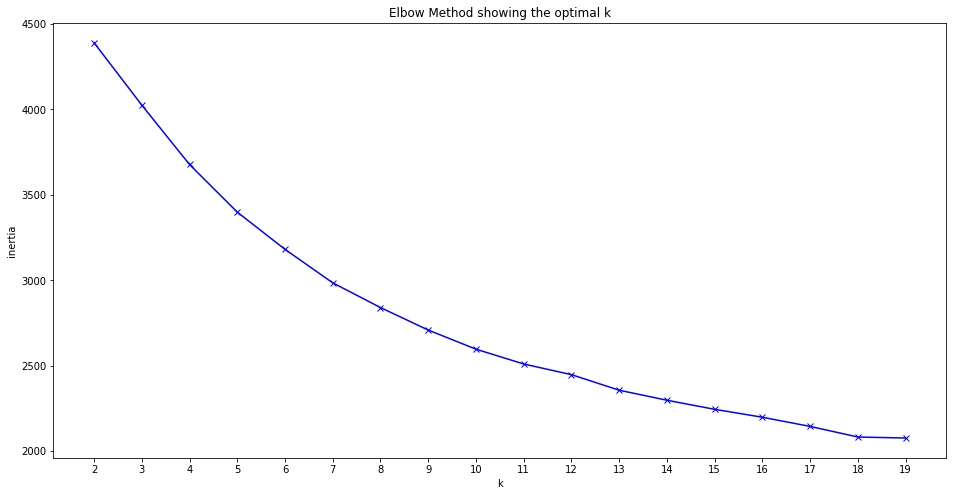

In [57]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

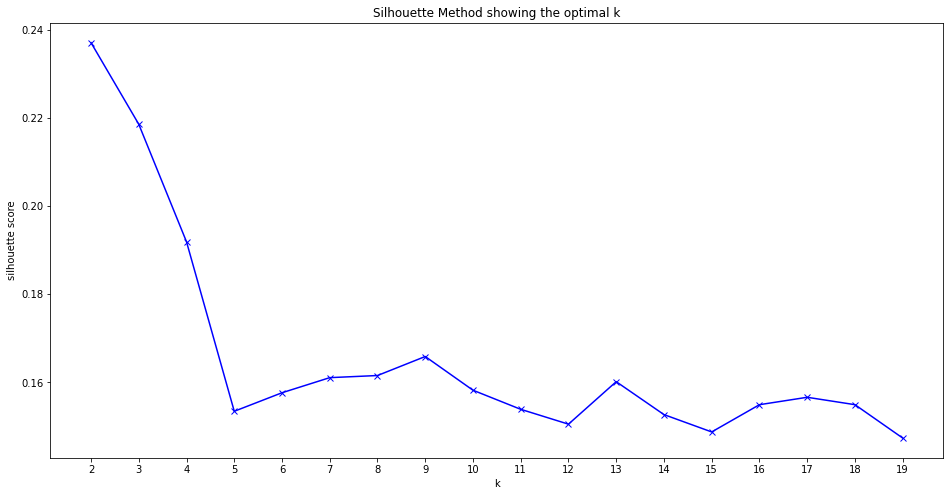

In [56]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
# 8.08 Continue with Class Example - Clustering and Data Pipeline